# Part 2 - 1: Data Collection

Here is the starting of Part 2 of our Data Science project 1.data Collection and Sentence Segmentation. We are here trying to collect text data using URL and compare with different python libraries like spacy,stanza and nltk.

## 0. Imports and Downloads

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import spacy
import nltk

In [2]:
# Download the Spacy English model
spacy.load('en_core_web_sm')

# Download the NLTK punkt tokenizer
nltk.download('punkt')

# Load the Spacy English model
spacy_nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bleuze3u\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 1. Dataset extraction

In this part, we create a function (**create_text_dataset(src, n)**) that scrapes the provided source to retrieve a text of length n. By length n, we mean the **number of sentences**, naively considered as the number of utterances ending with a dot ("."). This approach allows us not to favor any linguistic library at the stage of data collection.

In [12]:
def create_text_dataset(src, n_sentences):
    
    # Option 1: we provide a website URL
    if src.startswith('http'):

        response = requests.get(src)
        soup = BeautifulSoup(response.content, 'html.parser')
        # We consider text content of an article to be all the text in <p> tags
        text = "".join([p.text for p in soup.select("p")])

    # Option 2: we provide a local file path    
    else:
        with open(src, 'r') as f:

            text = f.read()

    # Keep only the first n sentences
    # This is a very naive way of splitting text into sentences, but this is only to get an order of the size of the dataset
    sentences = re.split(r'\.', text)
    sentences = [s for s in sentences[:n_sentences]]

    # We return the text only
    return ".".join(sentences)

In [13]:
# Two examples of how to use the function
src1 = "https://en.wikipedia.org/wiki/List_of_female_scientists_in_the_20th_century"
src2 = "../../data/part1/Women_Scientists/Ada Yonath.txt"

n = 10
text1 = create_text_dataset(src1, n)
text2 = create_text_dataset(src2, n)

Example from a URL:

In [14]:
text1

'\n\nThis is a historical list dealing with women scientists in the 20th century. During this time period, women working in scientific fields were rare. Women at this time faced barriers in higher education and often denied access to scientific institutions; in the Western world, the first-wave feminist movement began to break down many of these barriers.\n'

Example from a local file:

In [15]:
text2

'\nAda E. Yonath (Hebrew: ×¢×“×” ×™×•×\xa0×ª, pronouncedÂ\xa0[Ëˆada joËˆnat]; born 22 June 1939)[1] is a Nobel laureate crystallographer best known for her pioneering work on the structure of ribosomes. She is the current director of the Helen and Milton A. Kimmelman Center for Biomolecular Structure and Assembly of the Weizmann Institute of Science.\nIn 2009, Yonath received the Nobel Prize in Chemistry along with Venkatraman Ramakrishnan and Thomas A. Steitz for her studies on the structure and function of the ribosome, becoming the first Israeli woman to win the Nobel Prize out of ten Israeli Nobel laureates,[2] the first woman from the Middle East to win a Nobel prize in the sciences,[3] and the first woman in 45 years to win the Nobel Prize for Chemistry.[4]\nAda Lifshitz (later Yonath)[5] was born in the Geula quarter of Jerusalem.[6] Her parents, Hillel and Esther Lifshitz, were Zionist Jews who immigrated to the British Mandate of Palestine (now Israel) from ZduÅ„ska Wola, Pola

We will now extract a dataset on which we will compare Spacy and NLTK.

In [17]:
src = "https://en.wikipedia.org/wiki/Philosophy_of_science"
n = 100
text = create_text_dataset(src, n)

# Saving the text to a file
with open("../../data/part2/dataset.txt", "w") as f:
    f.write(text)

## 2. Sentence segmentation

In this part, we compare the way Spacy and NLTK segment text into sentences.

### 2.1 Apply segmentation (Spacy & NLTK)

In [18]:
def analyze_sentences_spacy_nltk(text):

    # Analyzing the text with Spacy
    doc = spacy_nlp(text)
    spacy_sentences = [sent.text for sent in doc.sents]

    # Analyzing the text with NLTK
    nltk_sentences = nltk.tokenize.sent_tokenize(text)

    return spacy_sentences, nltk_sentences

In [19]:
spacy_sentences, nltk_sentences = analyze_sentences_spacy_nltk(text)

In [20]:
print("Spacy sentences:", len(spacy_sentences))
print("NLTK sentences:", len(nltk_sentences))

Spacy sentences: 80
NLTK sentences: 98


### 2.2 Shared Sentences

In [21]:
def get_shared_sentences(l1, l2):

    # Get the set of sentences recognized by both Spacy and NLTK
    s1, s2 = set(l1), set(l2)
    shared_set = s1.intersection(s2)

    # Create a dataframe with the shared sentences
    shared_df = pd.DataFrame({'shared_sentence': list(shared_set)})

    return shared_df

In [22]:
shared = get_shared_sentences(spacy_sentences, nltk_sentences)
shared

,shared_sentence
0,The scientific enterprise is embedded in parti...
1,Philosophies of the particular sciences range ...
2,"For example, should psychoanalysis, creation s..."
3,One early and influential account of scientifi...
4,"A vocal minority of philosophers, and Paul Fey..."
5,Philosophers have tried to make this heuristic...
6,In his work Novum Organum (1620)—an allusion t...
7,In addition to providing predictions about fut...
8,"That is, can chemistry be reduced to physics, ..."
9,The question of what counts as science and wha...


In [23]:
print(f"There are {len(shared)} sentences recognized by both Spacy and NLTK.")
# shared.to_csv("../../data/part2-shared-sentences.csv", index=False)

There are 45 sentences recognized by both Spacy and NLTK.


In [24]:
i = 0
while i < len(spacy_sentences):

    if nltk_sentences[i] != spacy_sentences[i]:

        print("Sentence", i)
        print("*NLTK: ", nltk_sentences[i])
        print("*Spacy:", spacy_sentences[i])
        print()
        
    i +=1

Sentence 4
*NLTK:  Ethical issues such as bioethics and scientific misconduct are often considered ethics or science studies rather than the philosophy of science.
*Spacy: Ethical issues such as bioethics and scientific misconduct are often considered ethics or science studies rather than the philosophy of science.


Sentence 7
*NLTK:  Some philosophers of science also use contemporary results in science to reach conclusions about philosophy itself.
*Spacy: Some philosophers of science also use contemporary results in science to reach conclusions about philosophy itself.


Sentence 10
*NLTK:  Thomas Kuhn's 1962 book The Structure of Scientific Revolutions was also formative, challenging the view of scientific progress as the steady, cumulative acquisition of knowledge based on a fixed method of systematic experimentation and instead of arguing that any progress is relative to a "paradigm", the set of questions, concepts, and practices that define a scientific discipline in a particular

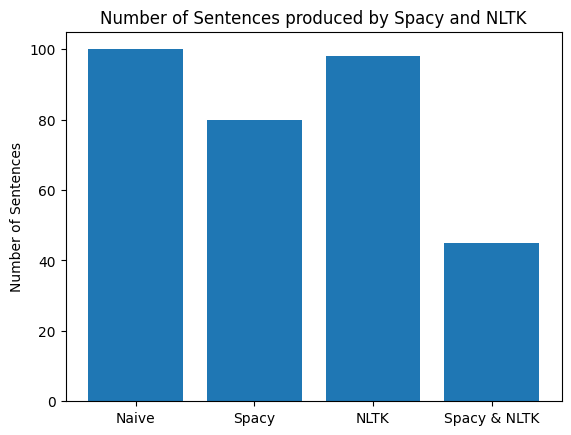

<Figure size 640x480 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt

# Define the data for the graph
labels = ["Naive", 'Spacy', 'NLTK', 'Spacy & NLTK']
values = [n, len(spacy_sentences), len(nltk_sentences), len(shared["shared_sentence"])]

# Create the bar graph
plt.bar(labels, values)

# Add labels to the graph
plt.title('Number of Sentences produced by Spacy and NLTK')
plt.ylabel('Number of Sentences')

# Show the graph
plt.show()
# plt.savefig("../../data/plots/part2-sentences-barplots.png", bbox_inches='tight')